![](../Assets/itd.png)
    
# Inteligencia Artificial 
## Arboles de decisión DataSet COVID19
## Usando parametros: 
## INTUBADO, UCI,NEUMONIA Y TIPO PACIENTE
### José Gabriel Rodriguez Rivas    
### Angel Omar Ceniceros Berumen


#### Conclusiones al  final de este Notebook

In [1]:
#Code cell 1
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("./Data/Covid/200723COVID19MEXICO.csv",encoding = "ISO-8859-1")


In [2]:
training

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,23/07/2020,1.16E+12,2,4,9,2,20,9,2,1,...,2,2,2,2,99,1,99,México,99,97
1,23/07/2020,0e50ac,2,4,9,2,9,9,5,2,...,2,1,2,2,99,1,99,México,99,2
2,23/07/2020,1dd91c,2,4,8,1,8,8,37,2,...,2,1,2,2,99,1,99,México,99,2
3,23/07/2020,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,2,99,1,99,México,99,97
4,23/07/2020,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,2,1,1,99,México,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879603,23/07/2020,1af1ae,1,12,19,2,19,19,39,1,...,2,2,2,2,1,3,99,México,99,97
879604,23/07/2020,193226,1,3,26,2,26,26,30,2,...,2,1,2,1,1,3,99,México,99,2
879605,23/07/2020,0fe94e,2,12,24,1,24,24,28,1,...,1,2,2,2,2,3,99,México,99,97
879606,23/07/2020,118851,2,12,9,1,9,9,5,1,...,2,2,2,2,2,3,99,México,99,97


In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879608 entries, 0 to 879607
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  879608 non-null  object
 1   ID_REGISTRO          879608 non-null  object
 2   ORIGEN               879608 non-null  int64 
 3   SECTOR               879608 non-null  int64 
 4   ENTIDAD_UM           879608 non-null  int64 
 5   SEXO                 879608 non-null  int64 
 6   ENTIDAD_NAC          879608 non-null  int64 
 7   ENTIDAD_RES          879608 non-null  int64 
 8   MUNICIPIO_RES        879608 non-null  int64 
 9   TIPO_PACIENTE        879608 non-null  int64 
 10  FECHA_INGRESO        879608 non-null  object
 11  FECHA_SINTOMAS       879608 non-null  object
 12  FECHA_DEF            879608 non-null  object
 13  INTUBADO             879608 non-null  int64 
 14  NEUMONIA             879608 non-null  int64 
 15  EDAD                 879608 non-nu

In [4]:
training['Survived'] = training['FECHA_DEF'].apply(lambda fecha: 1 if fecha=='9999-99-99' else 0)

In [41]:
sobrevivientes=0
muertos=0
for sobrevive in training['Survived']:
    if sobrevive == 1:
        sobrevivientes=sobrevivientes+1
    else:
        muertos=muertos+1

In [42]:
print('sobrevivientes {}'.format(sobrevivientes))
print('muertes {}'.format(muertos))

sobrevivientes 825207
muertes 54401


In [5]:
training.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Survived
0,23/07/2020,1.16E+12,2,4,9,2,20,9,2,1,...,2,2,2,99,1,99,México,99,97,1
1,23/07/2020,0e50ac,2,4,9,2,9,9,5,2,...,1,2,2,99,1,99,México,99,2,1
2,23/07/2020,1dd91c,2,4,8,1,8,8,37,2,...,1,2,2,99,1,99,México,99,2,0
3,23/07/2020,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,99,1,99,México,99,97,1
4,23/07/2020,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,1,1,99,México,99,2,1


### Paso 3: Entrenar y calificar el modelo del árbol de decisiones

In [6]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

In [7]:
#code cell 9
columns = ["INTUBADO","NEUMONIA", "UCI", "TIPO_PACIENTE"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [8]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [9]:
#code cell 11
clf_train.score(X_input,y_target)

0.942805204136388

### Paso 4: Visualizar el árbol

In [10]:
clasificacion = ['SOBREVIVE','NO SOBREVIVE']

In [11]:
#code cell 12
from sklearn.externals.six import StringIO
with open("./Data/Covid/covid.dot", 'w') as f:
    f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns,
                          class_names=clasificacion)
  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [12]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng ./Data/Covid/covid.dot -o ./Data/Covid/covid.png


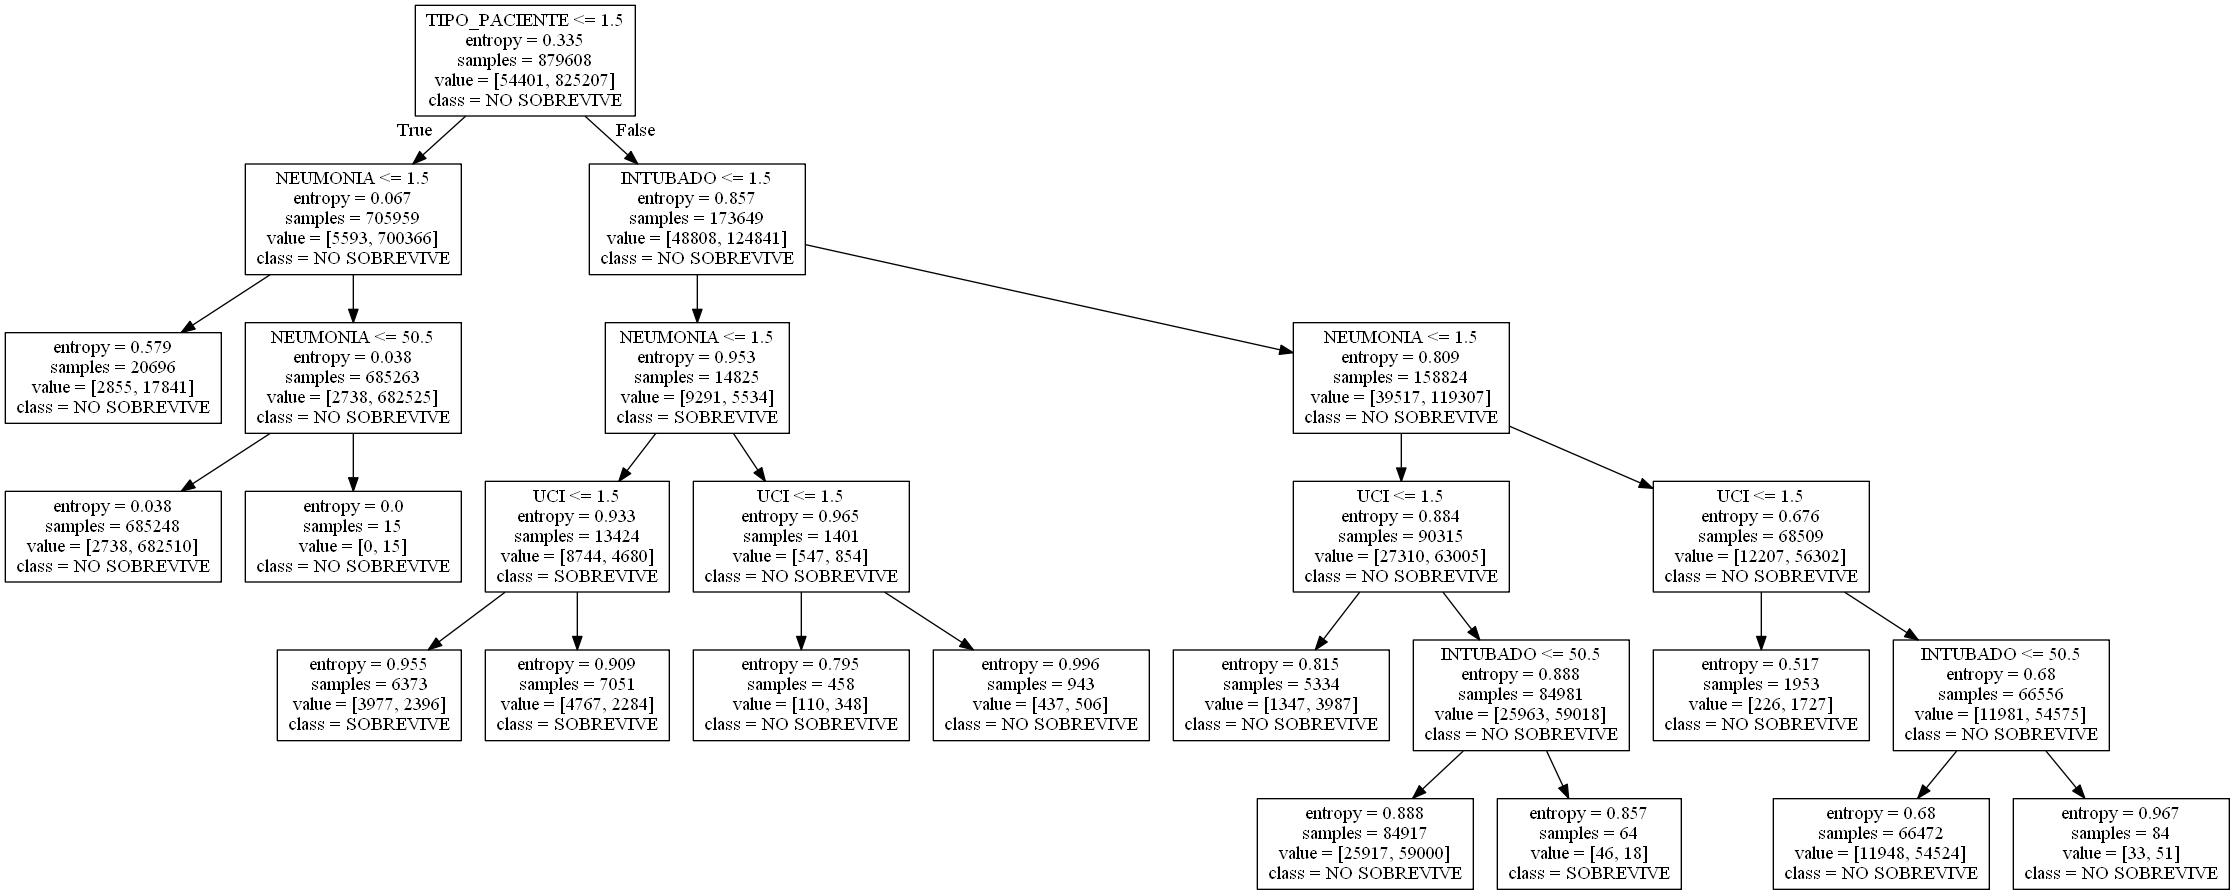

In [13]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("./Data/Covid/covid.png")

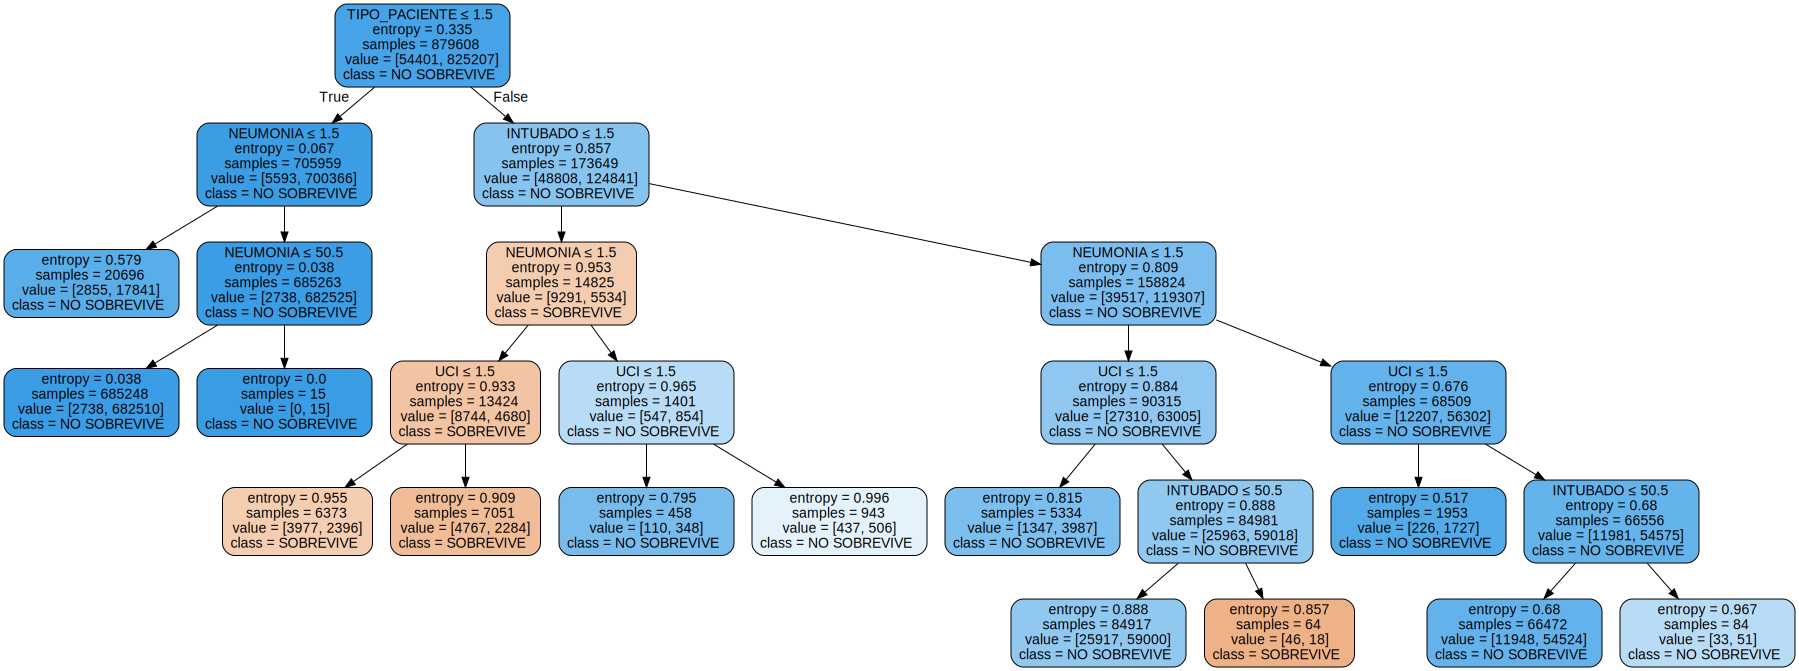

In [14]:
import graphviz
dot_data = tree.export_graphviz(
    clf_train,
    out_file = None,
    class_names = clasificacion,
    
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('CovidColor1',format='png')
graph

## Parte 2: Aplicar el modelo del árbol de decisiones

### Paso 1: Importar y elaborar los datos
En este paso, importará y preparará los datos para el análisis.

In [15]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("./Data/Covid/200723COVID19MEXICO.csv",encoding = "ISO-8859-1")

In [16]:
testing['Survived'] = testing['FECHA_DEF'].apply(lambda fecha: 1 if fecha=='9999-99-99' else 0)

In [17]:
testing.head()


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Survived
0,23/07/2020,1.16E+12,2,4,9,2,20,9,2,1,...,2,2,2,99,1,99,México,99,97,1
1,23/07/2020,0e50ac,2,4,9,2,9,9,5,2,...,1,2,2,99,1,99,México,99,2,1
2,23/07/2020,1dd91c,2,4,8,1,8,8,37,2,...,1,2,2,99,1,99,México,99,2,0
3,23/07/2020,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,99,1,99,México,99,97,1
4,23/07/2020,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,1,1,99,México,99,2,1


In [18]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

### Hacer predicciones con el metodo predict del clasificador

In [19]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'ID_REGISTRO':testing['ID_REGISTRO']})

#display the first few rows of the data set
target_labels.head()

,Est_Survival,ID_REGISTRO
0,1,1.16E+12
1,1,0e50ac
2,1,1dd91c
3,1,1ad302
4,1,1dd6f1


In [37]:
sobrevivientes=0
muertos=0
for sobrevive in target_labels['Est_Survival']:
    if sobrevive == 1:
        sobrevivientes=sobrevivientes+1
    else:
        muertos=muertos+1

In [39]:
print('sobrevivientes {}'.format(sobrevivientes))
print('muertes {}'.format(muertos))

sobrevivientes 866120
muertes 13488


In [20]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./Data/Covid/200723COVID19MEXICO.csv",encoding = "ISO-8859-1")
all_data['Survived'] = all_data['FECHA_DEF'].apply(lambda fecha: 1 if fecha=='9999-99-99' else 0)

# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['ID_REGISTRO','Survived']], on=['ID_REGISTRO'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result
acc

0.9404040939079871

### Parte 3: Evaluar el modelo del árbol de decisiones

In [23]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv(
    "./Data/Covid/200723COVID19MEXICO.csv",
    encoding = "ISO-8859-1",
    usecols=["INTUBADO","NEUMONIA", "UCI", "TIPO_PACIENTE","FECHA_DEF"]
)
#View info for the new dataframe
all_data.head()

,TIPO_PACIENTE,FECHA_DEF,INTUBADO,NEUMONIA,UCI
0,1,9999-99-99,97,2,97
1,2,9999-99-99,2,1,2
2,2,19/04/2020,2,1,2
3,1,9999-99-99,97,2,97
4,2,9999-99-99,2,1,2


In [26]:
all_data['Survived'] = all_data['FECHA_DEF'].apply(lambda fecha: 1 if fecha=='9999-99-99' else 0)

In [27]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879608 entries, 0 to 879607
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   TIPO_PACIENTE  879608 non-null  int64 
 1   FECHA_DEF      879608 non-null  object
 2   INTUBADO       879608 non-null  int64 
 3   NEUMONIA       879608 non-null  int64 
 4   UCI            879608 non-null  int64 
 5   Survived       879608 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 40.3+ MB


In [28]:
all_data.head()

,TIPO_PACIENTE,FECHA_DEF,INTUBADO,NEUMONIA,UCI,Survived
0,1,9999-99-99,97,2,97,1
1,2,9999-99-99,2,1,2,1
2,2,19/04/2020,2,1,2,0
3,1,9999-99-99,97,2,97,1
4,2,9999-99-99,2,1,2,1


In [30]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [31]:
type(X_train)

numpy.ndarray

In [32]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [33]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.9428210336438256 Testing score = 0.9427018792419367


## Conclusiones

Debido a que use los mismos datos para entrenar el modelo y hacer las pruebas, al final la puntuacion resultante entre estas dos fue igual, ya que estamos usando los mismos datos para la fase de entrenamiento y pruebas.
No obstante el hecho de que hayan salido las mismas puntuaciones no significa que las predicciones hayan sido presisas, ya que el **numero de muertos** en los datos originales era de **54401** y en la **prediccion** el resultado fueron **13488 muertos**. Esto es debido a que quiza los parametros que usamos para predeciar no sean todos lo que influyan en sobrevivir al COVID o no. Debido a que omiti muchos valores la prediccion fue un tanto imprecisa, pero muy cercana al valor real.
